Author - AnilKumar Vempadapu

This project is to perform EDA on the trending YouTube videos data in India using python

Data is obtained at - "https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download&select=INvideos.csv"

#### Step 1: Read data into data frame using pandas

In [1]:
import pandas as pd
india_df = pd.read_csv("INvideos.csv")

#### Step 2: Description of data set

In [2]:
n_samples = india_df.shape[0]
print("Number of samples in data -",n_samples)
print("Features of the data - ")
for feature in india_df.columns:
    print(feature)

Number of samples in data - 37352
Features of the data - 
video_id
trending_date
title
channel_title
category_id
publish_time
tags
views
likes
dislikes
comment_count
thumbnail_link
comments_disabled
ratings_disabled
video_error_or_removed
description


#### Step 3: removal of NAN entries or missing data

In [3]:
india_df.dropna()

if n_samples-india_df.shape[0] > 0:
    print("Number of samples removed due to missing data -",n_samples-india_df.shape[0])
else:
    print("That's great! No sample has missing data..!!")

That's great! No sample has missing data..!!


#### Step 4: adding category from the Json file

In [4]:
import json

categories_dict = {}
with open('In_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        categories_dict[category['id']] = category['snippet']['title']

#change dictionary key from string to int
cat_dict = {int(key):categories_dict[key] for key in categories_dict.keys()}

india_df["category"] = india_df["category_id"].map(cat_dict)

# print(india_df)

####  Observation 1: identifying the data timeline range

In [5]:
import datetime
india_df['publish_time'] = pd.to_datetime(india_df['publish_time']).dt.date
start_date = india_df["publish_time"].min()
end_date = india_df["publish_time"].max()

print("Data is collected from", start_date, "to", end_date)

Data is collected from 2017-05-27 to 2018-06-13


#### Observation 2: Analysis based on views, likes and dislikes

In [6]:
most_views = india_df["views"].max()
most_viewed_video = india_df[india_df["views"]==most_views].to_dict(orient='records')[0]

print("Details of the most viewed video in the data is - ")
print("Title -", most_viewed_video["title"])
print("Youtube channel -", most_viewed_video["channel_title"])
print("Description of video -", most_viewed_video["description"])
print("Number of views are " + str(most_viewed_video["views"]))

Details of the most viewed video in the data is - 
Title - YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Youtube channel - YouTube Spotlight
Description of video - YouTube Rewind 2017. Celebrating the videos, people, music and memes that made 2017. #YouTubeRewind\n\nMeet the featured Creators in Rewind: https://rewind2017.withyoutube.com/creators\nSpend more time with your favorite Creators, videos and trends from 2017: https://yt.be/rewind2017\nTest your Rewind knowledge with our trivia game: http://yt.be/dejaview\n\nWatch trending videos from 2017: http://youtube.com/rewind\nSee the trends as they happen: http://youtube.com/trending\n\nWatch the Behind the Scenes video: https://youtu.be/OIQQ8jmsbMM  \nSee all the Easter Eggs: https://goo.gl/3U9otg\n\nMusic by The Hood Internet: https://www.youtube.com/thehoodinternet\n\nYouTube Rewind 2017 produced by Portal A
Number of views are 125432237


In [7]:
most_likes = india_df["likes"].max()
most_liked_video = india_df[india_df["likes"]==most_likes].to_dict(orient='records')[0]

print("Details of the most liked video in the data is - ")
print("Title -", most_liked_video["title"])
print("Youtube channel -", most_liked_video["channel_title"])
print("Description of video -", most_liked_video["description"])
print("Number of views are " + str(most_liked_video["views"]) + " and the number of likes are " + str(most_liked_video["likes"]))

Details of the most liked video in the data is - 
Title - YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Youtube channel - YouTube Spotlight
Description of video - YouTube Rewind 2017. Celebrating the videos, people, music and memes that made 2017. #YouTubeRewind\n\nMeet the featured Creators in Rewind: https://rewind2017.withyoutube.com/creators\nSpend more time with your favorite Creators, videos and trends from 2017: https://yt.be/rewind2017\nTest your Rewind knowledge with our trivia game: http://yt.be/dejaview\n\nWatch trending videos from 2017: http://youtube.com/rewind\nSee the trends as they happen: http://youtube.com/trending\n\nWatch the Behind the Scenes video: https://youtu.be/OIQQ8jmsbMM  \nSee all the Easter Eggs: https://goo.gl/3U9otg\n\nMusic by The Hood Internet: https://www.youtube.com/thehoodinternet\n\nYouTube Rewind 2017 produced by Portal A
Number of views are 125432237 and the number of likes are 2912710


In [8]:
most_dislikes = india_df["dislikes"].max()
most_disliked_video = india_df[india_df["dislikes"]==most_dislikes].to_dict(orient='records')[0]

print("Details of the most disliked video in the data is - ")
print("Title -", most_disliked_video["title"])
print("Youtube channel -", most_disliked_video["channel_title"])
print("Description of video -", most_disliked_video["description"])
print("Number of views are " + str(most_disliked_video["views"]) + " and the number of dislikes are " + str(most_disliked_video["dislikes"]))

Details of the most disliked video in the data is - 
Title - YouTube Rewind: The Shape of 2017 | #YouTubeRewind
Youtube channel - YouTube Spotlight
Description of video - YouTube Rewind 2017. Celebrating the videos, people, music and memes that made 2017. #YouTubeRewind\n\nMeet the featured Creators in Rewind: https://rewind2017.withyoutube.com/creators\nSpend more time with your favorite Creators, videos and trends from 2017: https://yt.be/rewind2017\nTest your Rewind knowledge with our trivia game: http://yt.be/dejaview\n\nWatch trending videos from 2017: http://youtube.com/rewind\nSee the trends as they happen: http://youtube.com/trending\n\nWatch the Behind the Scenes video: https://youtu.be/OIQQ8jmsbMM  \nSee all the Easter Eggs: https://goo.gl/3U9otg\n\nMusic by The Hood Internet: https://www.youtube.com/thehoodinternet\n\nYouTube Rewind 2017 produced by Portal A
Number of views are 125432237 and the number of dislikes are 1545017


##### It is interesting to note that the video that has the highest number of views and likes also has the highest number of dislikes!!

#### Observation 5: Categorywise analysis

In [9]:
categdf = india_df.groupby('category').agg("count")["video_id"]
categdf = categdf.rename('Number of Videos')

In [10]:
print("The category in which the maximum number of vidoes uploaded is - "
      + categdf.idxmax() + " with " + str(categdf.max()) + " videos out of total " + str(categdf.sum()) + " videos!")

print("The category in which the minimum number of vidoes uploaded is - "
      + categdf.idxmin() + " with " + str(categdf.min()) + " videos out of total " + str(categdf.sum()) + " videos!")

The category in which the maximum number of vidoes uploaded is - Entertainment with 16712 videos out of total 37247 videos!
The category in which the minimum number of vidoes uploaded is - Pets & Animals with 3 videos out of total 37247 videos!


<AxesSubplot:xlabel='Number of Videos', ylabel='category'>

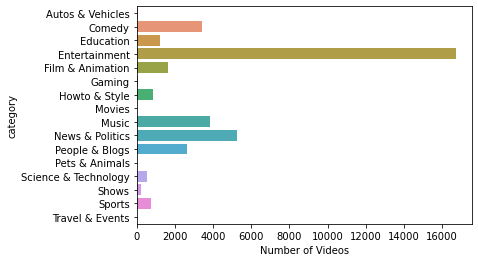

In [11]:
import seaborn as sns
sns.barplot(x=categdf, y=categdf.index)

##### The most number of videos uploaded in India are in enetrtainment (roughly 45% of number of videos) followed by News-politics (14%) and Music (10%), whereas the least number of videos uploaded are in Pets & Animals.

In [12]:
viewsdf = india_df.groupby('category')['views'].agg('sum')

In [13]:
print("The category which has the maximum number of total views is - "
      + viewsdf.idxmax() + " with " + str(viewsdf.max()) + " views out of total " + str(viewsdf.sum()) + " views!")

print("The category which has the minimum number of total views is - "
      + viewsdf.idxmin() + " with " + str(viewsdf.min()) + " views out of total " + str(viewsdf.sum()) + " views!")

The category which has the maximum number of total views is - Entertainment with 16120390974 views out of total 39604345873 views!
The category which has the minimum number of total views is - Travel & Events with 1374342 views out of total 39604345873 views!


<AxesSubplot:xlabel='views', ylabel='category'>

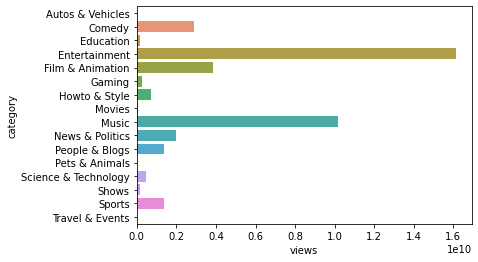

In [14]:
sns.barplot(x=viewsdf, y=viewsdf.index)

##### The most number of viewed videos in India are in enetrtainment (roughly 41% of number of views) followed by Music (26%), whereas the least viewed videos are in Travel & Events.

In [15]:
nv_view_df = pd.concat([categdf,viewsdf],axis=1)
nv_view_df["Views per video"] = nv_view_df["views"]/nv_view_df["Number of Videos"]

In [16]:
maxview_cat = nv_view_df["Views per video"].idxmax()
print("The category which has the maximum number of views per video is - "
      + maxview_cat + "!! with a total of " + str(viewsdf[maxview_cat]) + " views for " + str(categdf[maxview_cat]) + 
     " videos with an average of " + str(round(nv_view_df["Views per video"].max())) + " views per video!")


minview_cat = nv_view_df["Views per video"].idxmin()
print("The category which has the minimum number of views per video is - "
      + minview_cat + "!! with a total of " + str(viewsdf[minview_cat]) + " views for " + str(categdf[minview_cat]) + 
     " videos with an average of " + str(round(nv_view_df["Views per video"].min())) + " views per video!")

The category which has the maximum number of views per video is - Gaming!! with a total of 274722506 views for 66 videos with an average of 4162462 views per video!
The category which has the minimum number of views per video is - Education!! with a total of 145533791 views for 1227 videos with an average of 118609 views per video!


<AxesSubplot:xlabel='Views per video', ylabel='category'>

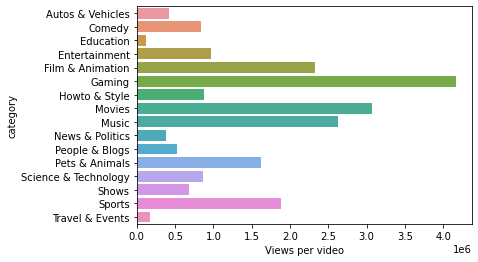

In [17]:
sns.barplot(x=nv_view_df["Views per video"], y=viewsdf.index)

##### Gaming videos seems to be more popular in India with an average of 4M views per video, followed by Movies with an average of 3M views per video whereas Education videos seems to be the least popular with an avergae of 0.12M views per video.

In [18]:
likesdf = india_df.groupby('category')['likes'].agg('sum')

In [19]:
print("The category which has the maximum number of total likes is - "
      + likesdf.idxmax() + " with " + str(likesdf.max()) + " likes out of total " + str(likesdf.sum()) + " likes!")

print("The category which has the minimum number of total likes is - "
      + likesdf.idxmin() + " with " + str(likesdf.min()) + " likes out of total " + str(likesdf.sum()) + " likes!")

The category which has the maximum number of total likes is - Entertainment with 396146637 likes out of total 1011375558 likes!
The category which has the minimum number of total likes is - Travel & Events with 16939 likes out of total 1011375558 likes!


<AxesSubplot:xlabel='likes', ylabel='category'>

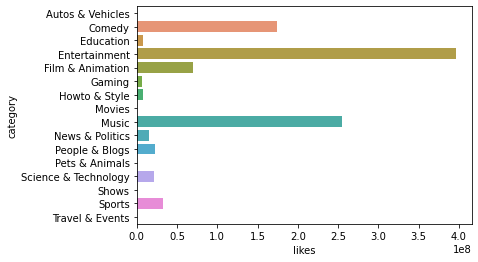

In [20]:
sns.barplot(x=likesdf, y=likesdf.index)

In [21]:
like_view_df = pd.concat([likesdf,viewsdf],axis=1)
like_view_df["Likes per view"] = like_view_df["likes"]/like_view_df["views"]

In [22]:
maxlikeview_cat = like_view_df["Likes per view"].idxmax()
print("The category which has the maximum number of likes per view is - "
      + maxlikeview_cat + "!! with a total of " + str(likesdf[maxlikeview_cat]) + " likes for " + str(viewsdf[maxlikeview_cat]) + 
     " views with a percentage of " + str(round(100*like_view_df["Likes per view"].max(),2)) + "% likes!")

minlikeview_cat = like_view_df["Likes per view"].idxmin()
print("The category which has the minimum number of likes per view is - "
      + minlikeview_cat + "!! with a total of " + str(likesdf[minlikeview_cat]) + " likes for " + str(viewsdf[minlikeview_cat]) + 
     " views with a percentage of " + str(round(100*(like_view_df["Likes per view"].min()),2)) + "% likes!")

The category which has the maximum number of likes per view is - Pets & Animals!! with a total of 362534 likes for 4879743 views with a percentage of 7.43% likes!
The category which has the minimum number of likes per view is - Shows!! with a total of 787516 likes for 139581891 views with a percentage of 0.56% likes!


<AxesSubplot:xlabel='Likes per view', ylabel='category'>

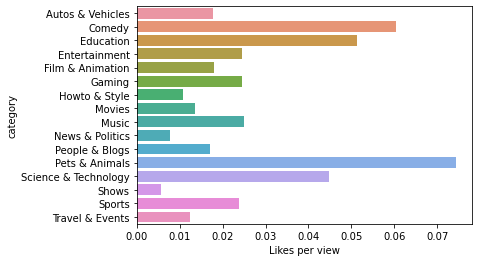

In [23]:
sns.barplot(x=like_view_df["Likes per view"], y=like_view_df.index)

##### Pets-Animals videos seems to be more liked in India with 7 likes out of every 100 views, followed by Comedy and Education with 6 and 5 likes per 100 views whereas Shows seems to be least liked with 5 likes out of every 1000 views

In [24]:
dislikesdf = india_df.groupby('category')['dislikes'].agg('sum')

In [25]:
print("The category which has the maximum number of total dislikes is - "
      + dislikesdf.idxmax() + " with " + str(dislikesdf.max()) + " dislikes out of total " + str(dislikesdf.sum()) + " dislikes!")

print("The category which has the minimum number of total dislikes is - "
      + dislikesdf.idxmin() + " with " + str(dislikesdf.min()) + " dislikes out of total " + str(dislikesdf.sum()) + " dislikes!")

The category which has the maximum number of total dislikes is - Entertainment with 27428929 dislikes out of total 62185412 dislikes!
The category which has the minimum number of total dislikes is - Travel & Events with 616 dislikes out of total 62185412 dislikes!


##### Surprisingly the categories which have the most and least likes i.e. Entertainment and Travel-Events are also the categories with most and least dislikes!!

In [26]:
like_dislike_df = pd.concat([likesdf,dislikesdf],axis=1)
like_dislike_df["Dislikes to likes ratio"] = like_dislike_df["dislikes"]/like_dislike_df["likes"]

<AxesSubplot:xlabel='Dislikes to likes ratio', ylabel='category'>

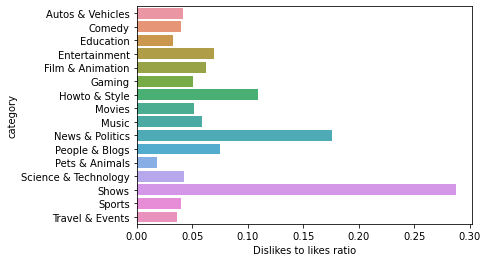

In [27]:
sns.barplot(x=like_dislike_df["Dislikes to likes ratio"], y=like_dislike_df.index)

##### Videos under Shows category have the most dislikes to likes ratio (29 dislikes for every 100 likes) followed by News-politics (17 dislikes for every 100likes)! 

#### Obervation 6: Brief analysis on Entertainment based videos

In [28]:
entertnmnt_df = india_df[india_df['category']=='Entertainment']

In [29]:
entertnmnt_channel_views = entertnmnt_df.groupby('channel_title')['views'].agg('sum')
print("The channel which has the maximum number of total views in Entertainment is - "
      + entertnmnt_channel_views.idxmax() + " with " + str(entertnmnt_channel_views.max()) + 
      " views out of total " + str(entertnmnt_channel_views.sum()) + " views!")

The channel which has the maximum number of total views in Entertainment is - Marvel Entertainment with 1277657898 views out of total 16120390974 views!


In [30]:
entertnmnt_channel_likes = entertnmnt_df.groupby('channel_title')['likes'].agg('sum')
print("The channel which has the maximum number of total likes in Entertainment is - "
      + entertnmnt_channel_likes.idxmax() + " with " + str(entertnmnt_channel_likes.max()) + 
      " likes out of total " + str(entertnmnt_channel_likes.sum()) + " likes!")

The channel which has the maximum number of total likes in Entertainment is - Amit Bhadana with 62418215 likes out of total 396146637 likes!


##### Marvel Entertainment seems to own the major viewership (with 8% views), whereas Amit Bhadana is the most liked channel (with 15% likes) in Entertainment channels.

#### Obervation 7: Brief analysis on News and politics based videos

In [31]:
news_df = india_df[india_df['category']=='News & Politics']

In [34]:
maxview_news = news_df["views"].max()
maxview_news_video = news_df[news_df["views"]==maxview_news].to_dict(orient='records')[0]

print("Details of the most viewed news video in the data is - ")
print("Title -", maxview_news_video["title"])
print("Youtube channel -", maxview_news_video["channel_title"])
print("Description of video -", maxview_news_video["description"])
print("Number of views are " + str(maxview_news_video["views"]))

Details of the most viewed news video in the data is - 
Title - No VIP treatment for Salman Khan in jail: Jodhpur DIG (Prisons)
Youtube channel - The Times of India
Description of video - Bollywood actor Salman Khan, who was convicted and sentenced to five years imprisonment in blackbuck poaching case by a court, will not receive any special treatment during his stay in jail, Jodhpur DIG (Prisons) Vikram Singh said. Singh added that Khan had made no demands or special requests - including for drinking water. The actor will receive his jail uniform tomorrow. The senior officer said that he did not want the actor to be left alone, even as he referred to him as someone ‘who does not seem easily scared.’\n\nSubscribe to Times Of India's Youtube channel here: http://goo.gl/WgIatu\n\nAlso Subscribe to Bombay Times Youtube Channel here: http://goo.gl/AdXcgU\n\nSocial Media Links: \nFacebook : https://www.facebook.com/TimesofIndia\nTwitter : https://twitter.com/timesofindia\nGoogle + : https:/

In [32]:
news_channel_views = news_df.groupby('channel_title')['views'].agg('sum')
print("The channel which has the maximum number of total views in News-Politics is - "
      + news_channel_views.idxmax() + " with " + str(news_channel_views.max()) + 
      " views out of total " + str(news_channel_views.sum()) + " views!")

The channel which has the maximum number of total views in News-Politics is - V6 News Telugu with 87224720 views out of total 1994263812 views!


In [38]:
news_channel_dislikes = news_df.groupby('channel_title')['dislikes'].agg('sum')
print("The channel which has the maximum number of total dislikes in News-Politics is - "
      + news_channel_dislikes.idxmax() + " with " + str(news_channel_dislikes.max()) + 
      " dislikes out of total " + str(news_channel_dislikes.sum()) + " dislikes!")

The channel which has the maximum number of total dislikes in News-Politics is - ABN Telugu with 223891 dislikes out of total 2737604 dislikes!


In [47]:
news_channel_likes = news_df.groupby('channel_title')['likes'].agg('sum')
news_dislike_to_like_ratio = news_channel_dislikes/news_channel_likes

print("Number of news channels that has more than one dislike for every like - " +
      str(len(news_dislike_to_like_ratio[news_dislike_to_like_ratio>1])))
print("Channel which has the highest dislike to like ration is - " + news_dislike_to_like_ratio.idxmax() + 
     " with an average of " + str(round(news_dislike_to_like_ratio.max(),3)) + " dislikes for every like!")

Number of news channels that has more than one dislike for every like - 8
Channel which has the highest dislike to like ration is - Sakshi TV with an average of 2.207 dislikes for every like


##### No VIP treatment for Salman Khan in jail: Jodhpur DIG (Prisons) by The Times of India is the most viewed video in news category \{\n} V6 News Telugu seems to have the most viewership in India.

There exists 8 channels in News & Politics category which has more than 1 dislike for every like and Sakshi TV is the most hated channel with an average of 2.207 dislikes for every like!!

#### Obervation 8: Brief analysis on Sports based videos

In [48]:
sports_df = india_df[india_df['category']=='Sports']

In [49]:
maxview_sports = sports_df["views"].max()
maxview_sports_video = sports_df[sports_df["views"]==maxview_sports].to_dict(orient='records')[0]

print("Details of the most viewed sports video in the data is - ")
print("Title -", maxview_sports_video["title"])
print("Youtube channel -", maxview_sports_video["channel_title"])
print("Description of video -", maxview_sports_video["description"])
print("Number of views are " + str(maxview_sports_video["views"]))

Details of the most viewed sports video in the data is - 
Title - Real Life Trick Shots 2 | Dude Perfect
Youtube channel - Dude Perfect
Description of video - Trick shots should be an everyday thing! \nThanks to Kay Jewelers for sponsoring this video! \nWin Valentine's Day by going to http://dudeperfect.com/KayJewelers\n\n► Click HERE to subscribe to Dude Perfect! http://bit.ly/SubDudePerfect\n\n► Click HERE to watch our most recent videos! http://bit.ly/NewestDudePerfectVideos\nhttp://bit.ly/NewestDPVideos\n\n► SHOP our NEW Merchandise! - http://bit.ly/DPStore\n►Click HERE to join the exclusive Dude Perfect T-Shirt Club! http://bit.ly/DPTShirtClub\n\nMusic: GRiZ x Big Gigantic - “Good Times Roll”\n►Click HERE to download: http://bit.ly/GoodTimesRollDP\n\n►http://mynameisgriz.com/\n►http://facebook.com/mynameisGRiZ/\n►http://soundcloud.com/griz\n►http://twitter.com/mynameisgriz\n►http://instagram.com/mynameisgriz/\n\nPlay our NEW iPhone game!\n► PLAY Endless Ducker on iPhone -- http://

In [50]:
sports_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
135,efpUCPITNmw,17.14.11,Russia Vs Argentina 0-1 - All Goals & Highligh...,NugoBasilaiaa,17,2017-11-11,Russia Vs Argentina 0-1 - All Goals & Highligh...,1641745,7643,702,1082,https://i.ytimg.com/vi/efpUCPITNmw/default.jpg,False,False,False,Russia Vs Argentina 0-1 - All Goals & Highligh...,Sports
249,ysik6z44B1E,17.15.11,Stephanie McMahon questions Kurt Angle's leade...,WWE,17,2017-11-14,"wwe|""world wrestling entertainment""|""wrestling...",1574756,32539,843,3096,https://i.ytimg.com/vi/ysik6z44B1E/default.jpg,False,False,False,After SmackDown LIVE added John Cena to its Su...,Sports
381,PnYrL1rK-z8,17.15.11,"Hardik Patel's video goes viral, Hardik terms ...",Tv9 Gujarati,17,2017-11-13,"Gujarati|""India""|""Gujarat News""|""Gujarati News...",42816,169,55,85,https://i.ytimg.com/vi/PnYrL1rK-z8/default.jpg,False,False,False,"Hardik Patel's video goes viral, Hardik terms ...",Sports
488,ysik6z44B1E,17.16.11,Stephanie McMahon questions Kurt Angle's leade...,WWE,17,2017-11-14,"wwe|""world wrestling entertainment""|""wrestling...",1717414,34163,884,3175,https://i.ytimg.com/vi/ysik6z44B1E/default.jpg,False,False,False,After SmackDown LIVE added John Cena to its Su...,Sports
533,ExBnZv7mYys,17.16.11,England vs Brazil 0-0 - Extended Match Highlig...,GOLAZO TV,17,2017-11-14,"England|""vs""|""Brazil""|""0-0""|""Highlights""|""Goal...",749448,2680,244,513,https://i.ytimg.com/vi/ExBnZv7mYys/default.jpg,False,False,False,England vs Brazil 0-0 - Extended Match Highlig...,Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36216,v-dfygYIfLs,18.08.06,Old School Trick Shots | Dude Perfect,Dude Perfect,17,2018-06-04,"dude perfect|""dude perfect stereotypes""|""dude ...",11465487,407347,8769,35173,https://i.ytimg.com/vi/v-dfygYIfLs/default.jpg,False,False,False,It’s time to look old! Special thanks to the U...,Sports
36385,2B8kcxeYinI,18.09.06,7 Superstars who broke their face in the ring:...,WWE,17,2018-06-08,"wwe|""world wrestling entertainment""|""wrestling...",544977,11682,398,1139,https://i.ytimg.com/vi/2B8kcxeYinI/default.jpg,False,False,False,"From John Cena to handsome Rusev, these Supers...",Sports
36920,RXOUAfGaZZo,18.12.06,Incredible displays of barehanded strength: WW...,WWE,17,2018-06-11,"wwe|""world wrestling entertainment""|""wrestling...",523993,12624,538,1077,https://i.ytimg.com/vi/RXOUAfGaZZo/default.jpg,False,False,False,Any Superstar with two hands has a chance to s...,Sports
37078,0_K4z_7fvGA,18.13.06,Sami Zayn challenges Bobby Lashley to a milita...,WWE,17,2018-06-12,"wwe|""world wrestling entertainment""|""wrestling...",1038768,15162,1196,1522,https://i.ytimg.com/vi/0_K4z_7fvGA/default.jpg,False,False,False,The disrespectful Sami Zayn tries to put Bobby...,Sports


#### Obervation 9: Brief analysis on Movies based videos

In [51]:
movies_df = india_df[india_df['category']=='Movies']

In [52]:
maxview_movies = movies_df["views"].max()
maxview_movies_video = movies_df[movies_df["views"]==maxview_movies].to_dict(orient='records')[0]

print("Details of the most viewed movie in the data is - ")
print("Title -", maxview_movies_video["title"])
print("Youtube channel -", maxview_movies_video["channel_title"])
print("Description of video -", maxview_movies_video["description"])
print("Number of views are " + str(maxview_movies_video["views"]))

Details of the most viewed movie in the data is - 
Title - Golak Bugni Bank Te Batua Full Movie (HD) | Harish Verma | Simi Chahal | Superhit Punjabi Movies
Youtube channel - Rhythm Boyz
Description of video - Rhythm Boyz Entertainment & Hayre Omjee Studio Presents:GOLAK BUGNI BANK TE BATUAReleasing on 13th April 2018Directed by - Ksshitij ChaudharyProduced by - Karaj Gill & Talwinder HayreCo-producers - Jaspal Singh Sandhu, Amiek Virk, Munish SahniStory Screenplay : Dheeraj Rattan Dialogue : Rakesh Dhawan Additional Dialogue : Surmeet Maavi Production Designer : Kazi Rafik Ali and Liyakat Ali KhanDOP : Parixit Warrier Editor : Rikki KajleChief Assistant Director : Deepak ThaperCostume Designer: Nitasha Bhateja Roy Music & Background Score : Jatinder shah Singers : Amrinder Gill, Sunidhi Chauhan, Bir Singh, Gurshabad, Gurpreet Maan, Bikk DhillonLyricist : Happy Raikoti, Bir Singh, Harmanjeet, Sabir Ali Sabir, Bikk Dhillon, Sidhu SarabjitArt Director : Dipankar Mondal Post Production Con

In [54]:
maxlike_movies = movies_df["likes"].max()
maxlike_movies_video = movies_df[movies_df["likes"]==maxlike_movies].to_dict(orient='records')[0]

print("Details of the most viewed movie in the data is - ")
print("Title -", maxlike_movies_video["title"])
print("Youtube channel -", maxlike_movies_video["channel_title"])
print("Description of video -", maxlike_movies_video["description"])
print("Number of views are " + str(maxlike_movies_video["likes"]))

Details of the most viewed movie in the data is - 
Title - Golak Bugni Bank Te Batua Full Movie (HD) | Harish Verma | Simi Chahal | Superhit Punjabi Movies
Youtube channel - Rhythm Boyz
Description of video - Rhythm Boyz Entertainment & Hayre Omjee Studio Presents:GOLAK BUGNI BANK TE BATUAReleasing on 13th April 2018Directed by - Ksshitij ChaudharyProduced by - Karaj Gill & Talwinder HayreCo-producers - Jaspal Singh Sandhu, Amiek Virk, Munish SahniStory Screenplay : Dheeraj Rattan Dialogue : Rakesh Dhawan Additional Dialogue : Surmeet Maavi Production Designer : Kazi Rafik Ali and Liyakat Ali KhanDOP : Parixit Warrier Editor : Rikki KajleChief Assistant Director : Deepak ThaperCostume Designer: Nitasha Bhateja Roy Music & Background Score : Jatinder shah Singers : Amrinder Gill, Sunidhi Chauhan, Bir Singh, Gurshabad, Gurpreet Maan, Bikk DhillonLyricist : Happy Raikoti, Bir Singh, Harmanjeet, Sabir Ali Sabir, Bikk Dhillon, Sidhu SarabjitArt Director : Dipankar Mondal Post Production Con